In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]=(8,6)
matplotlib.rcParams["figure.facecolor"]="#00000000"

import seaborn as sns
sns.set_style("darkgrid")
sns.set(font="Verdana")
import plotly.express as px

import folium
import geopandas
from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup

In [2]:
df_incident_raw = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present.csv", index_col=None)

In [3]:
pd.set_option("display.max_columns", 50)

In [4]:
df_incident_raw

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2021/07/25 12:00:00 AM,2021/07/25,00:00,2021,Sunday,2021/07/25 01:41:00 PM,105718906372,1057189,216105573,NaN,II,Coplogic Initial,True,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,NaN,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022/06/28 11:58:00 PM,2022/06/28,23:58,2022,Tuesday,2022/06/28 11:58:00 PM,116554371012,1165543,220264913,NaN,VS,Vehicle Supplement,NaN,71012,Other Offenses,Other Offenses,"License Plate, Recovered",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022/03/11 10:30:00 AM,2022/03/11,10:30,2022,Friday,2022/03/11 08:03:00 PM,113048071000,1130480,226040232,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/05/15 05:47:00 PM,2021/05/15,17:47,2021,Saturday,2021/05/15 05:47:00 PM,103051807043,1030518,210183345,NaN,VS,Vehicle Supplement,NaN,7043,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Motorcycle",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022/06/28 05:22:00 PM,2022/06/28,17:22,2022,Tuesday,2022/06/28 05:22:00 PM,116535107041,1165351,220361741,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662829,2022/11/16 01:20:00 PM,2022/11/16,13:20,2022,Wednesday,2022/11/16 01:23:00 PM,121535871011,1215358,220788985,223201750.0,VI,Vehicle Initial,NaN,71011,Other Offenses,Other Offenses,"License Plate, Found",Open or Active,FIELDING ST \ STOCKTON ST,25397000.0,Central,North Beach,3.0,37.803724,-122.409847,POINT (-122.4098469542869 37.8037237067947),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
662830,2022/11/15 10:15:00 PM,2022/11/15,22:15,2022,Tuesday,2022/11/15 10:15:00 PM,121504507055,1215045,220787642,223193371.0,VI,Vehicle Initial,NaN,7055,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Recovered, Stolen outside SF",Open or Active,SELBY ST \ QUESADA AVE,20756000.0,Out of SF,Bayview Hunters Point,10.0,37.738649,-122.400808,POINT (-122.40080826801052 37.73864877116737),87.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
662831,2022/11/16 01:55:00 PM,2022/11/16,13:55,2022,Wednesday,2022/11/16 01:55:00 PM,121542775000,1215427,220789905,223201860.0,II,Initial,NaN,75000,Missing Person,Missing Person,Found Person,Open or Active,HAYES ST \ POLK ST,24436000.0,Northern,Tenderloin,6.0,37.777512,-122.418043,POINT (-122.41804316781624 37.77751171020645),21.0,NaN,1.0,1.0,1.0,NaN,10.0,4.0
662832,2022/11/12 10:40:00 AM,2022/11/12,10:40,2022,Saturday,2022/11/13 01:04:00 AM,121511206224,1215112,226216035,NaN,II,Coplogic Initial,True,6224,Larceny Theft,Larceny - From Vehicle,"Theft, From Unlocked Vehicle, >$950",Open or Active,BROADWAY \ DAVIS ST,24798000.0,Central,Financial District/South Beach,3.0,37.798881,-122.398696,POINT (-122.39869570327996 37.79888096617859),77.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0


In [5]:
df_incident_raw = df_incident_raw.sort_values(by='Incident Datetime', ascending=False, ignore_index=True)
df_incident_raw

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2022/11/16 12:58:00 AM,2022/11/16,00:58,2022,Wednesday,2022/11/16 01:02:00 AM,121506326080,1215063,220787830,223200092.0,II,Initial,NaN,26080,Other Miscellaneous,Other,Conspiracy,Cite or Arrest Adult,LEAVENWORTH ST \ PINE ST,25230000.0,Central,Nob Hill,3.0,37.790254,-122.415559,POINT (-122.41555908738222 37.79025429821475),16.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
1,2022/11/16 12:58:00 AM,2022/11/16,00:58,2022,Wednesday,2022/11/16 01:02:00 AM,121506328160,1215063,220787830,223200092.0,II,Initial,NaN,28160,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Vehicle",Cite or Arrest Adult,LEAVENWORTH ST \ PINE ST,25230000.0,Central,Nob Hill,3.0,37.790254,-122.415559,POINT (-122.41555908738222 37.79025429821475),16.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
2,2022/11/16 12:58:00 AM,2022/11/16,00:58,2022,Wednesday,2022/11/16 01:02:00 AM,121506306240,1215063,220787830,223200092.0,II,Initial,NaN,6240,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, Att.",Cite or Arrest Adult,LEAVENWORTH ST \ PINE ST,25230000.0,Central,Nob Hill,3.0,37.790254,-122.415559,POINT (-122.41555908738222 37.79025429821475),16.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
3,2022/11/16 12:55:00 PM,2022/11/16,12:55,2022,Wednesday,2022/11/16 01:01:00 PM,121534463010,1215344,220789018,223201664.0,II,Initial,NaN,63010,Warrant,Other,"Warrant Arrest, Local SF Warrant",Cite or Arrest Adult,CHURCH ST \ 18TH ST,25712000.0,Mission,Castro/Upper Market,8.0,37.761290,-122.428354,POINT (-122.4283540660218 37.7612895722579),37.0,NaN,NaN,NaN,5.0,NaN,5.0,3.0
4,2022/11/16 12:55:00 PM,2022/11/16,12:55,2022,Wednesday,2022/11/16 01:01:00 PM,121534415162,1215344,220789018,223201664.0,II,Initial,NaN,15162,Offences Against The Family And Children,Other,Violation of Stay Away Order,Cite or Arrest Adult,CHURCH ST \ 18TH ST,25712000.0,Mission,Castro/Upper Market,8.0,37.761290,-122.428354,POINT (-122.4283540660218 37.7612895722579),37.0,NaN,NaN,NaN,5.0,NaN,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662829,2018/01/01 01:00:00 AM,2018/01/01,01:00,2018,Monday,2018/01/02 08:01:00 PM,61999806374,619998,186001279,NaN,II,Coplogic Initial,True,6374,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,NEW MONTGOMERY ST \ MARKET ST \ MONTGOMERY ST,30735000.0,Central,Financial District/South Beach,6.0,37.788721,-122.402066,POINT (-122.4020657306611 37.78872115135928),32.0,NaN,NaN,NaN,NaN,NaN,10.0,6.0
662830,2018/01/01 01:00:00 AM,2018/01/01,01:00,2018,Monday,2018/01/01 09:22:00 AM,61895805081,618958,180000990,180011461.0,II,Initial,NaN,5081,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Forcible Entry",Open or Active,35TH AVE \ MORAGA ST,27700000.0,Taraval,Sunset/Parkside,4.0,37.755351,-122.493751,POINT (-122.49375077008791 37.755350921231994),39.0,NaN,NaN,NaN,NaN,NaN,7.0,10.0
662831,2018/01/01 01:00:00 AM,2018/01/01,01:00,2018,Monday,2018/01/05 11:24:00 AM,62105071000,621050,186003548,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662832,2018/01/01 01:00:00 AM,2018/01/01,01:00,2018,Monday,2018/01/02 11:08:00 AM,61958471000,619584,186000748,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,FILL

### Create month column

In [6]:
df_incident_raw["Incident Date"] = pd.to_datetime(df_incident_raw["Incident Date"])
df_incident_raw["month"] = df_incident_raw["Incident Date"].dt.month

In [7]:
df_incident_raw["date"] = df_incident_raw["Incident Date"].dt.day

In [8]:
df_incident_raw.head(2)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,month,date
0,2022/11/16 12:58:00 AM,2022-11-16,00:58,2022,Wednesday,2022/11/16 01:02:00 AM,121506326080,1215063,220787830,223200092.0,II,Initial,NaN,26080,Other Miscellaneous,Other,Conspiracy,Cite or Arrest Adult,LEAVENWORTH ST \ PINE ST,25230000.0,Central,Nob Hill,3.0,37.790254,-122.415559,POINT (-122.41555908738222 37.79025429821475),16.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11,16
1,2022/11/16 12:58:00 AM,2022-11-16,00:58,2022,Wednesday,2022/11/16 01:02:00 AM,121506328160,1215063,220787830,223200092.0,II,Initial,NaN,28160,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Vehicle",Cite or Arrest Adult,LEAVENWORTH ST \ PINE ST,25230000.0,Central,Nob Hill,3.0,37.790254,-122.415559,POINT (-122.41555908738222 37.79025429821475),16.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11,16


**Drop Duplicate Incident ID**

In [9]:
df_incident_raw = df_incident_raw.drop_duplicates(subset="Incident ID", keep="first")

In [10]:
df_incident_raw.reset_index()

,index,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,month,date
0,0,2022/11/16 12:58:00 AM,2022-11-16,00:58,2022,Wednesday,2022/11/16 01:02:00 AM,121506326080,1215063,220787830,223200092.0,II,Initial,NaN,26080,Other Miscellaneous,Other,Conspiracy,Cite or Arrest Adult,LEAVENWORTH ST \ PINE ST,25230000.0,Central,Nob Hill,3.0,37.790254,-122.415559,POINT (-122.41555908738222 37.79025429821475),16.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11,16
1,3,2022/11/16 12:55:00 PM,2022-11-16,12:55,2022,Wednesday,2022/11/16 01:01:00 PM,121534463010,1215344,220789018,223201664.0,II,Initial,NaN,63010,Warrant,Other,"Warrant Arrest, Local SF Warrant",Cite or Arrest Adult,CHURCH ST \ 18TH ST,25712000.0,Mission,Castro/Upper Market,8.0,37.761290,-122.428354,POINT (-122.4283540660218 37.7612895722579),37.0,NaN,NaN,NaN,5.0,NaN,5.0,3.0,11,16
2,5,2022/11/16 12:48:00 PM,2022-11-16,12:48,2022,Wednesday,2022/11/16 12:48:00 PM,121538316623,1215383,220788935,223201638.0,II,Initial,NaN,16623,Drug Offense,Drug Violation,"Cocaine, Base/rock, Possession For Sale",Cite or Arrest Adult,EDDY ST \ LARKIN ST,25148000.0,Tenderloin,Tenderloin,6.0,37.783311,-122.417529,POINT (-122.41752877437465 37.78331088878137),20.0,NaN,1.0,1.0,NaN,NaN,10.0,5.0,11,16
3,8,2022/11/16 12:48:00 AM,2022-11-16,00:48,2022,Wednesday,2022/11/16 12:48:00 AM,121507107043,1215071,220784137,223200070.0,VS,Vehicle Supplement,NaN,7043,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Motorcycle",Open or Active,LEAVENWORTH ST \ BUSH ST,25165000.0,Central,Nob Hill,3.0,37.789320,-122.415372,POINT (-122.41537192257195 37.78931984806438),50.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11,16
4,9,2022/11/16 12:42:00 PM,2022-11-16,12:42,2022,Wednesday,2022/11/16 12:42:00 PM,121532507055,1215325,220788866,223201389.0,VI,Vehicle Initial,NaN,7055,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Recovered, Stolen outside SF",Open or Active,FIELDING ST \ STOCKTON ST,25397000.0,Central,North Beach,3.0,37.803724,-122.409847,POINT (-122.4098469542869 37.8037237067947),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553130,662828,2018/01/01 01:00:00 AM,2018-01-01,01:00,2018,Monday,2018/01/01 09:18:00 AM,62069706244,620697,186002891,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,BADEN ST \ MANGELS AVE,21981000.0,Ingleside,West of Twin Peaks,8.0,37.733111,-122.439752,POINT (-122.43975249538143 37.73311125386989),95.0,NaN,NaN,NaN,NaN,NaN,5.0,9.0,1,1
553131,662829,2018/01/01 01:00:00 AM,2018-01-01,01:00,2018,Monday,2018/01/02 08:01:00 PM,61999806374,619998,186001279,NaN,II,Coplogic Initial,True,6374,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,NEW MONTGOMERY ST \ MARKET ST \ MONTGOMERY ST,30735000.0,Central,Financial District/South Beach,6.0,37.788721,-122.402066,POINT (-122.4020657306611 37.78872115135928),32.0,NaN,NaN,NaN,NaN,NaN,10.0,6.0,1,1
553132,662830,2018/01/01 01:00:00 AM,2018-01-01,01:00,2018,Monday,2018/01/01 09:22:00 AM,61895805081,618958,180000990,180011461.0,II,Initial,NaN,5081,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Forcible Entry",Open or Active,35TH AVE \ MORAGA ST,27700000.0,Taraval,Sunset/Parkside,4.0,37.755351,-122.493751,POINT (-122.49375077008791 37.755350921231994),39.0,NaN,

In [11]:
df_incident_raw.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,month,date
0,2022/11/16 12:58:00 AM,2022-11-16,00:58,2022,Wednesday,2022/11/16 01:02:00 AM,121506326080,1215063,220787830,223200092.0,II,Initial,NaN,26080,Other Miscellaneous,Other,Conspiracy,Cite or Arrest Adult,LEAVENWORTH ST \ PINE ST,25230000.0,Central,Nob Hill,3.0,37.790254,-122.415559,POINT (-122.41555908738222 37.79025429821475),16.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11,16
3,2022/11/16 12:55:00 PM,2022-11-16,12:55,2022,Wednesday,2022/11/16 01:01:00 PM,121534463010,1215344,220789018,223201664.0,II,Initial,NaN,63010,Warrant,Other,"Warrant Arrest, Local SF Warrant",Cite or Arrest Adult,CHURCH ST \ 18TH ST,25712000.0,Mission,Castro/Upper Market,8.0,37.761290,-122.428354,POINT (-122.4283540660218 37.7612895722579),37.0,NaN,NaN,NaN,5.0,NaN,5.0,3.0,11,16
5,2022/11/16 12:48:00 PM,2022-11-16,12:48,2022,Wednesday,2022/11/16 12:48:00 PM,121538316623,1215383,220788935,223201638.0,II,Initial,NaN,16623,Drug Offense,Drug Violation,"Cocaine, Base/rock, Possession For Sale",Cite or Arrest Adult,EDDY ST \ LARKIN ST,25148000.0,Tenderloin,Tenderloin,6.0,37.783311,-122.417529,POINT (-122.41752877437465 37.78331088878137),20.0,NaN,1.0,1.0,NaN,NaN,10.0,5.0,11,16
8,2022/11/16 12:48:00 AM,2022-11-16,00:48,2022,Wednesday,2022/11/16 12:48:00 AM,121507107043,1215071,220784137,223200070.0,VS,Vehicle Supplement,NaN,7043,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Motorcycle",Open or Active,LEAVENWORTH ST \ BUSH ST,25165000.0,Central,Nob Hill,3.0,37.789320,-122.415372,POINT (-122.41537192257195 37.78931984806438),50.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11,16
9,2022/11/16 12:42:00 PM,2022-11-16,12:42,2022,Wednesday,2022/11/16 12:42:00 PM,121532507055,1215325,220788866,223201389.0,VI,Vehicle Initial,NaN,7055,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Recovered, Stolen outside SF",Open or Active,FIELDING ST \ STOCKTON ST,25397000.0,Central,North Beach,3.0,37.803724,-122.409847,POINT (-122.4098469542869 37.8037237067947),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11,16


In [12]:
df_incident_raw.tail()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,month,date
662828,2018/01/01 01:00:00 AM,2018-01-01,01:00,2018,Monday,2018/01/01 09:18:00 AM,62069706244,620697,186002891,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,BADEN ST \ MANGELS AVE,21981000.0,Ingleside,West of Twin Peaks,8.0,37.733111,-122.439752,POINT (-122.43975249538143 37.73311125386989),95.0,NaN,NaN,NaN,NaN,NaN,5.0,9.0,1,1
662829,2018/01/01 01:00:00 AM,2018-01-01,01:00,2018,Monday,2018/01/02 08:01:00 PM,61999806374,619998,186001279,NaN,II,Coplogic Initial,True,6374,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,NEW MONTGOMERY ST \ MARKET ST \ MONTGOMERY ST,30735000.0,Central,Financial District/South Beach,6.0,37.788721,-122.402066,POINT (-122.4020657306611 37.78872115135928),32.0,NaN,NaN,NaN,NaN,NaN,10.0,6.0,1,1
662830,2018/01/01 01:00:00 AM,2018-01-01,01:00,2018,Monday,2018/01/01 09:22:00 AM,61895805081,618958,180000990,180011461.0,II,Initial,NaN,5081,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Forcible Entry",Open or Active,35TH AVE \ MORAGA ST,27700000.0,Taraval,Sunset/Parkside,4.0,37.755351,-122.493751,POINT (-122.49375077008791 37.755350921231994),39.0,NaN,NaN,NaN,NaN,NaN,7.0,10.0,1,1
662831,2018/01/01 01:00:00 AM,2018-01-01,01:00,2018,Monday,2018/01/05 11:24:00 AM,62105071000,621050,186003548,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
662832,2018/01/01 01:00:00 AM,2018-01-01,01:00,2018,Monday,2018/01/02 11:08:00 AM,61958471000,619584,186000748,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,FILLMORE ST \ GREENWICH ST,26747000.0,Northern,Marina,2.0,37.798952,-122.435866,POINT (-122.43586632130817 37.79895184912758),15.0,NaN,NaN,NaN,NaN,NaN,6.0,4.0,1,1


### Keep Columns

In [13]:
dates_cols = ["Incident Datetime","Incident Date", "Incident Year", "month", "date", "Incident Time", "Incident Day of Week"]

In [14]:
places_cols = ["Analysis Neighborhood", "Latitude","Longitude", "Point"]

In [15]:
wanted_cols = ["Incident ID","Incident Category"] + dates_cols + places_cols
wanted_cols

['Incident ID',
 'Incident Category',
 'Incident Datetime',
 'Incident Date',
 'Incident Year',
 'month',
 'date',
 'Incident Time',
 'Incident Day of Week',
 'Analysis Neighborhood',
 'Latitude',
 'Longitude',
 'Point']

In [16]:
df_incident = df_incident_raw[wanted_cols]
df_incident

,Incident ID,Incident Category,Incident Datetime,Incident Date,Incident Year,month,date,Incident Time,Incident Day of Week,Analysis Neighborhood,Latitude,Longitude,Point
0,1215063,Other Miscellaneous,2022/11/16 12:58:00 AM,2022-11-16,2022,11,16,00:58,Wednesday,Nob Hill,37.790254,-122.415559,POINT (-122.41555908738222 37.79025429821475)
3,1215344,Warrant,2022/11/16 12:55:00 PM,2022-11-16,2022,11,16,12:55,Wednesday,Castro/Upper Market,37.761290,-122.428354,POINT (-122.4283540660218 37.7612895722579)
5,1215383,Drug Offense,2022/11/16 12:48:00 PM,2022-11-16,2022,11,16,12:48,Wednesday,Tenderloin,37.783311,-122.417529,POINT (-122.41752877437465 37.78331088878137)
8,1215071,Recovered Vehicle,2022/11/16 12:48:00 AM,2022-11-16,2022,11,16,00:48,Wednesday,Nob Hill,37.789320,-122.415372,POINT (-122.41537192257195 37.78931984806438)
9,1215325,Motor Vehicle Theft,2022/11/16 12:42:00 PM,2022-11-16,2022,11,16,12:42,Wednesday,North Beach,37.803724,-122.409847,POINT (-122.4098469542869 37.8037237067947)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662828,620697,Larceny Theft,2018/01/01 01:00:00 AM,2018-01-01,2018,1,1,01:00,Monday,West of Twin Peaks,37.733111,-122.439752,POINT (-122.43975249538143 37.73311125386989)
662829,619998,Larceny Theft,2018/01/01 01:00:00 AM,2018-01-01,2018,1,1,01:00,Monday,Financial District/South Beach,37.788721,-122.402066,POINT (-122.4020657306611 37.78872115135928)
662830,618958,Burglary,2018/01/01 01:00:00 AM,2018-01-01,2018,1,1,01:00,Monday,Sunset/Parkside,37.755351,-122.493751,POINT (-122.49375077008791 37.755350921231994)
662831,621050,Lost Property,2018/01/01 01:00:00 AM,2018-01-01,2018,1,1,01:00,Monday,NaN,NaN,NaN,NaN


### Incidents by Year

In [17]:
(365*5)-45

1780

In [18]:
incident_per_day = int(len(df_incident)/1780)
incident_per_day

310

In [19]:
df_case_yearly = df_incident["Incident Year"].value_counts()
df_case_yearly = pd.DataFrame(df_case_yearly)
df_case_yearly.reset_index(inplace=True)
df_case_yearly = df_case_yearly.rename(columns={"index":"Year", "Incident Year":"Total Cases"})
df_case_yearly 

,Year,Total Cases
0,2018,126504
1,2019,122967
2,2021,108590
3,2020,98043
4,2022,97031


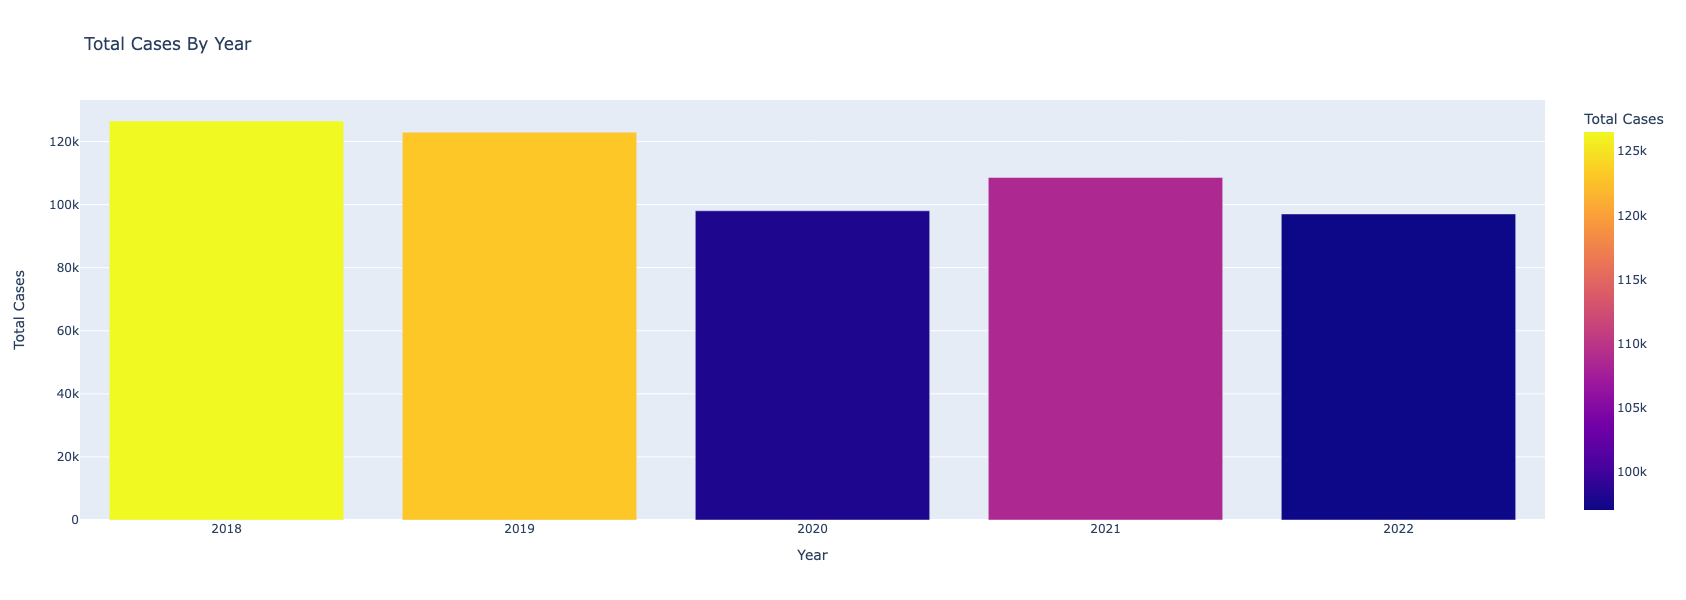

In [30]:
fig = px.bar(df_case_yearly, x= "Year", y="Total Cases",title='Total Cases By Year', color="Total Cases", width=1000, height=600)
fig.show()

## Yearly Dataset

In [32]:
incident_2018 = df_incident[df_incident["Incident Year"] == 2018]
incident_2019 = df_incident[df_incident["Incident Year"] == 2019]
incident_2020 = df_incident[df_incident["Incident Year"] == 2020]
incident_2021 = df_incident[df_incident["Incident Year"] == 2021]
incident_2022 = df_incident[df_incident["Incident Year"] == 2022]

In [33]:
monthly_2018 = incident_2018.groupby(["month"])["Incident ID"].nunique()
monthly_2019 = incident_2019.groupby(["month"])["Incident ID"].nunique()
monthly_2020 = incident_2020.groupby(["month"])["Incident ID"].nunique()
monthly_2021 = incident_2021.groupby(["month"])["Incident ID"].nunique()
monthly_2022 = incident_2022.groupby(["month"])["Incident ID"].nunique()

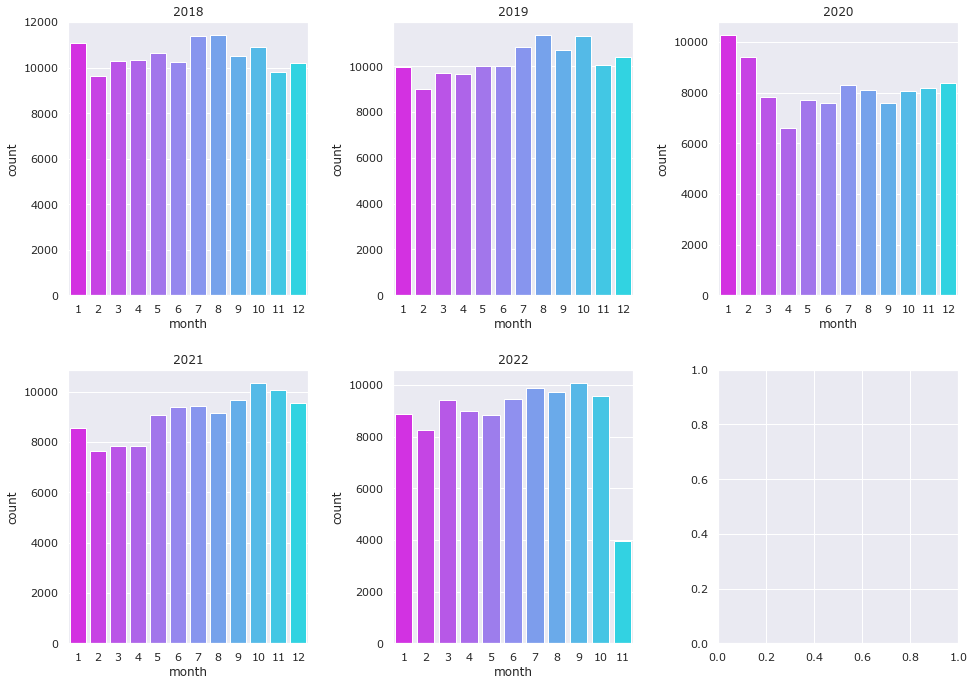

In [34]:
fig, axes = plt.subplots(2,3, figsize=(14,10))

axes[0,0].set_title("2018")
sns.countplot(ax=axes[0,0], data = incident_2018, x = "month", palette="cool_r")

axes[0,1].set_title("2019")
sns.countplot(ax=axes[0,1], data = incident_2019, x = "month", palette="cool_r")

axes[0,2].set_title("2020")
sns.countplot(ax=axes[0,2], data = incident_2020, x = "month", palette="cool_r")

axes[1,0].set_title("2021",)
sns.countplot(ax=axes[1,0], data = incident_2021, x = "month", palette="cool_r")

axes[1,1].set_title("2022",)
sns.countplot(ax=axes[1,1], data = incident_2022, x = "month", palette="cool_r")

plt.tight_layout(pad=2)

In [35]:
incident_2018_avg = int(len(incident_2018)/365)
incident_2019_avg = int(len(incident_2019)/365)
incident_2020_avg = int(len(incident_2020)/365)
incident_2021_avg = int(len(incident_2021)/365)
incident_2022_avg = int(len(incident_2022)/320)

In [36]:
incident_2018_avg

346

In [37]:
incident_2019_avg 

336

In [38]:
incident_2020_avg

268

In [39]:
incident_2021_avg

297

In [40]:
incident_2022_avg

303

### Check Incident Category

In [41]:
df_category = df_incident["Incident Category"].value_counts()
df_category = pd.DataFrame(df_category)     # make dataframe from series
df_category.reset_index(inplace=True)
df_category.rename(columns={"index":"category","Incident Category":"incidents_count"}, inplace=True)  
df_category.to_csv("data_semiclean/df_category.csv")
df_category

,category,incidents_count
0,Larceny Theft,192257
1,Malicious Mischief,38378
2,Non-Criminal,35041
3,Burglary,32979
4,Motor Vehicle Theft,32304
5,Assault,29709
6,Other Miscellaneous,27604
7,Recovered Vehicle,24861
8,Lost Property,18903
9,Fraud,16185


In [42]:
df_category_10 = df_category[:10]

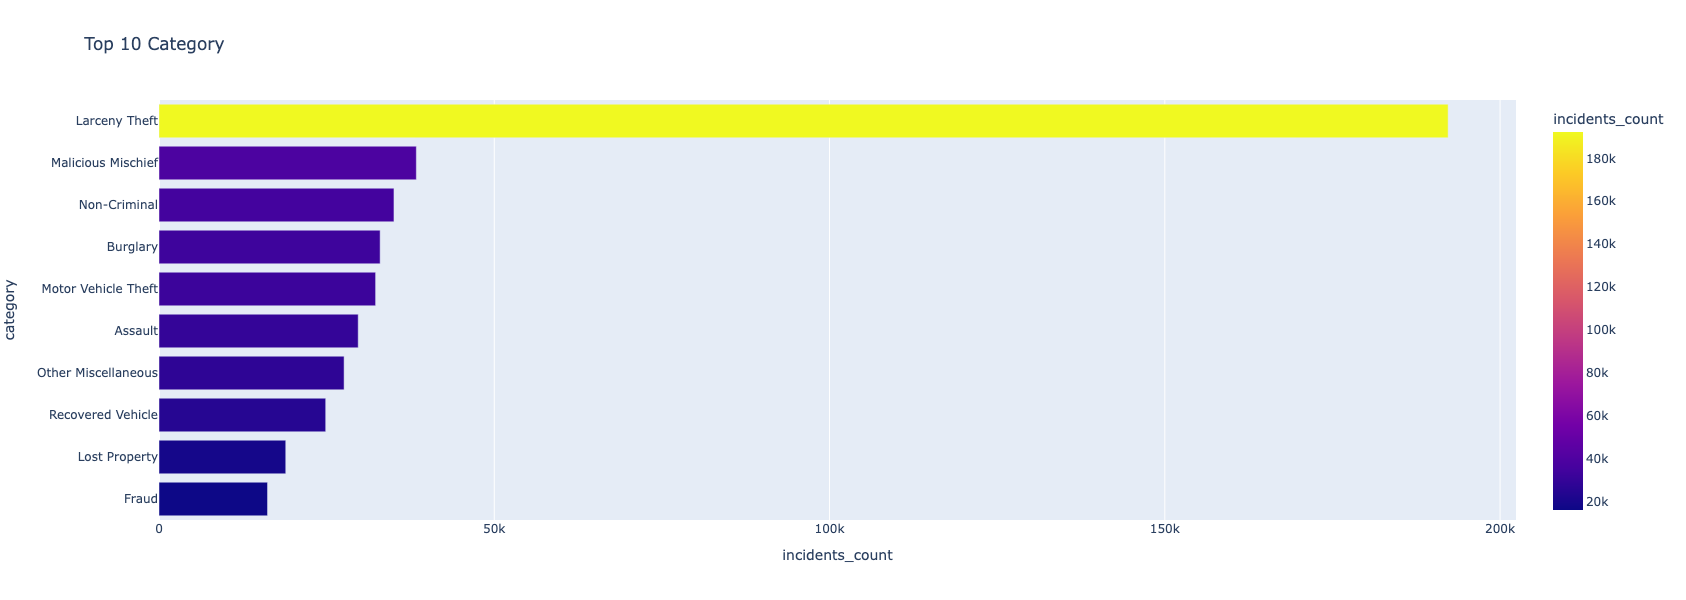

In [43]:
fig = px.bar(df_category_10, x = "incidents_count", y = "category", title='Top 10 Category',color="incidents_count",width=1000, height=600)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

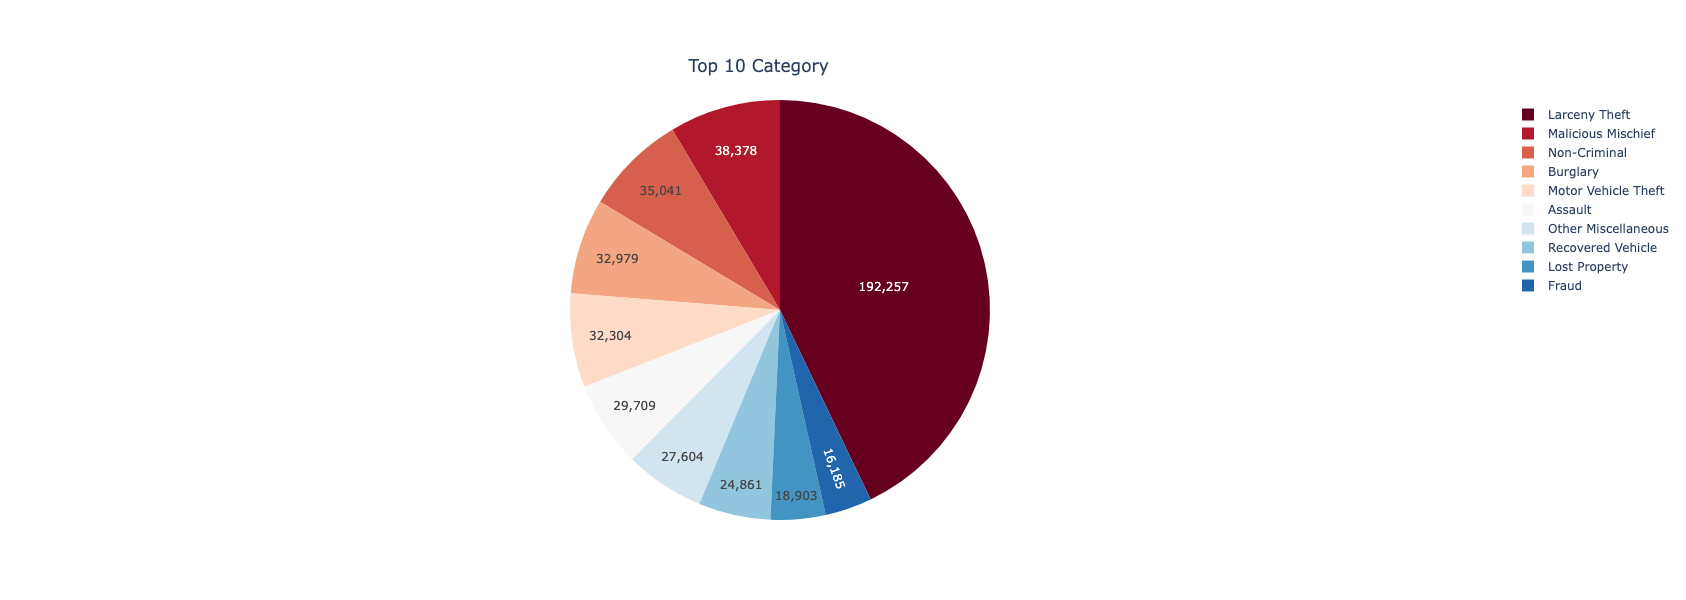

In [44]:
matplotlib.rcParams["figure.figsize"]=(12,10)
fig = px.pie(df_category_10, values='incidents_count', names='category', title='Top 10 Category',color_discrete_sequence=px.colors.sequential.RdBu ,width=1000, height=600)
fig.update_layout(
      title={
        'y':0.9,
        'x':0.45,'xanchor': 'center',
        'yanchor': 'top'})

fig.update_traces(textposition='inside', hoverinfo='label+percent', textinfo='value')
fig.show()

## Count Cases Per Day

In [45]:
df_incident

,Incident ID,Incident Category,Incident Datetime,Incident Date,Incident Year,month,date,Incident Time,Incident Day of Week,Analysis Neighborhood,Latitude,Longitude,Point
0,1215063,Other Miscellaneous,2022/11/16 12:58:00 AM,2022-11-16,2022,11,16,00:58,Wednesday,Nob Hill,37.790254,-122.415559,POINT (-122.41555908738222 37.79025429821475)
3,1215344,Warrant,2022/11/16 12:55:00 PM,2022-11-16,2022,11,16,12:55,Wednesday,Castro/Upper Market,37.761290,-122.428354,POINT (-122.4283540660218 37.7612895722579)
5,1215383,Drug Offense,2022/11/16 12:48:00 PM,2022-11-16,2022,11,16,12:48,Wednesday,Tenderloin,37.783311,-122.417529,POINT (-122.41752877437465 37.78331088878137)
8,1215071,Recovered Vehicle,2022/11/16 12:48:00 AM,2022-11-16,2022,11,16,00:48,Wednesday,Nob Hill,37.789320,-122.415372,POINT (-122.41537192257195 37.78931984806438)
9,1215325,Motor Vehicle Theft,2022/11/16 12:42:00 PM,2022-11-16,2022,11,16,12:42,Wednesday,North Beach,37.803724,-122.409847,POINT (-122.4098469542869 37.8037237067947)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662828,620697,Larceny Theft,2018/01/01 01:00:00 AM,2018-01-01,2018,1,1,01:00,Monday,West of Twin Peaks,37.733111,-122.439752,POINT (-122.43975249538143 37.73311125386989)
662829,619998,Larceny Theft,2018/01/01 01:00:00 AM,2018-01-01,2018,1,1,01:00,Monday,Financial District/South Beach,37.788721,-122.402066,POINT (-122.4020657306611 37.78872115135928)
662830,618958,Burglary,2018/01/01 01:00:00 AM,2018-01-01,2018,1,1,01:00,Monday,Sunset/Parkside,37.755351,-122.493751,POINT (-122.49375077008791 37.755350921231994)
662831,621050,Lost Property,2018/01/01 01:00:00 AM,2018-01-01,2018,1,1,01:00,Monday,NaN,NaN,NaN,NaN


In [46]:
df_incident_day = df_incident.groupby(["Incident Date"])["Incident ID"].count()
df_incident_day

Incident Date
2018-01-01    463
2018-01-02    327
2018-01-03    366
2018-01-04    385
2018-01-05    369
             ... 
2022-11-12    281
2022-11-13    246
2022-11-14    222
2022-11-15    175
2022-11-16    149
Name: Incident ID, Length: 1781, dtype: int64

In [47]:
df_incident_day = pd.DataFrame(df_incident_day)
df_incident_day = df_incident_day.rename(columns={"Incident ID":"Total Cases"})  
df_incident_day.to_csv("data_semiclean/df_incident_day.csv")
df_incident_day

,Total Cases
Incident Date,
2018-01-01,463
2018-01-02,327
2018-01-03,366
2018-01-04,385
2018-01-05,369
...,...
2022-11-12,281
2022-11-13,246
2022-11-14,222


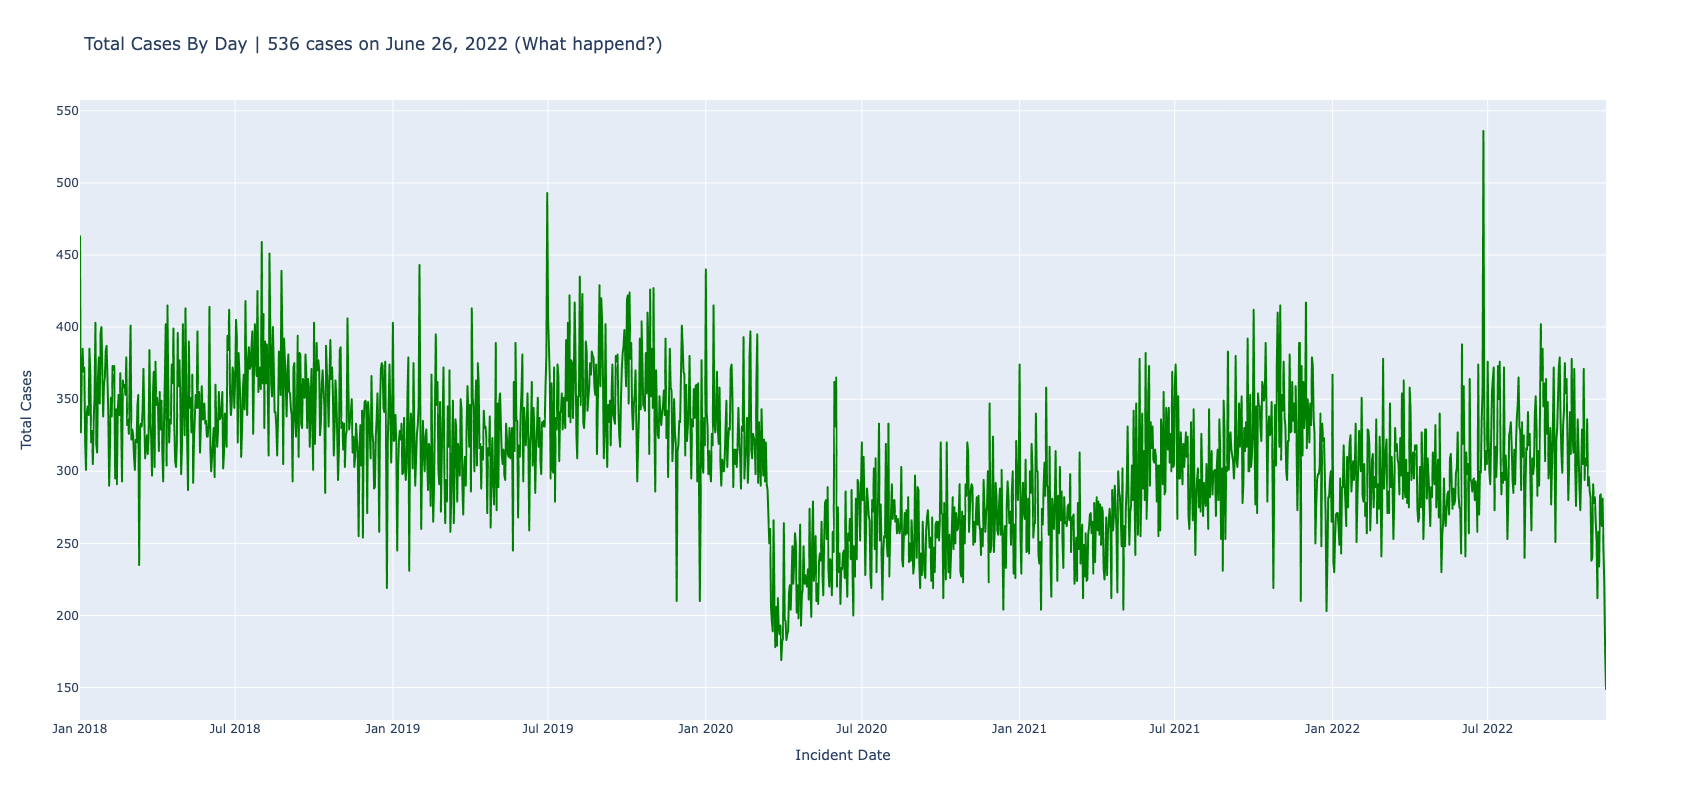

In [49]:
fig = px.line(df_incident_day, x=df_incident_day.index, y="Total Cases", title='Total Cases By Day | 536 cases on June 26, 2022 (What happend?)', width=1200, height=800)
fig.update_traces(line_color='green')
fig.show()

### June 26, 2022

In [50]:
df_incident[df_incident["Incident Date"]== "2022-06-26"]

,Incident ID,Incident Category,Incident Datetime,Incident Date,Incident Year,month,date,Incident Time,Incident Day of Week,Analysis Neighborhood,Latitude,Longitude,Point
53218,1176130,Larceny Theft,2022/06/26 12:54:00 PM,2022-06-26,2022,6,26,12:54,Sunday,Financial District/South Beach,37.786731,-122.404583,POINT (-122.40458331824809 37.78673056551673)
53219,1164993,Larceny Theft,2022/06/26 12:53:00 PM,2022-06-26,2022,6,26,12:53,Sunday,Financial District/South Beach,37.784560,-122.407337,POINT (-122.40733704162238 37.784560141211806)
53220,1164611,Recovered Vehicle,2022/06/26 12:52:00 PM,2022-06-26,2022,6,26,12:52,Sunday,NaN,NaN,NaN,NaN
53221,1164429,Burglary,2022/06/26 12:50:00 AM,2022-06-26,2022,6,26,00:50,Sunday,Tenderloin,37.781447,-122.417146,POINT (-122.41714561338313 37.78144749392477)
53223,1164617,Recovered Vehicle,2022/06/26 12:48:00 PM,2022-06-26,2022,6,26,12:48,Sunday,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53820,1165173,Larceny Theft,2022/06/26 01:00:00 AM,2022-06-26,2022,6,26,01:00,Sunday,Sunset/Parkside,37.764033,-122.509402,POINT (-122.50940219269224 37.76403273428497)
53821,1176014,Larceny Theft,2022/06/26 01:00:00 AM,2022-06-26,2022,6,26,01:00,Sunday,Tenderloin,37.778719,-122.414741,POINT (-122.4147412230519 37.77871942789032)
53822,1166088,Suspicious Occ,2022/06/26 01:00:00 AM,2022-06-26,2022,6,26,01:00,Sunday,Mission,37.751034,-122.411746,POINT (-122.41174622597137 37.75103389375139)
53823,1164426,Miscellaneous Investigation,2022/06/26 01:00:00 AM,2022-06-26,2022,6,26,01:00,Sunday,Marina,37.799843,-122.436046,POINT (-122.43604617512675 37.7998429520262)


In [51]:
len(df_incident[df_incident["Incident Date"]== "2022-06-26"])

536